# 초기 설정

In [36]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 선형 회귀

* 선형 회귀 모델 함수
$$y = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n + \epsilon$$ <br>
* 선형 회귀 모델 예측
$$\hat y= \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n$$
<br>
* 선형 회귀 모델 예측(벡터 형태)
$$\hat y = h_\theta(\boldsymbol{x}) = \boldsymbol{\theta} \cdot \boldsymbol{x}$$

## 정규 방정식(OLS)

$$ \boldsymbol{\hat\theta} = (\boldsymbol{X}^T \boldsymbol{X})^{-1}\boldsymbol{X}^T \boldsymbol{y}$$

<img src = './IMG_0455.jpg' width = '450' heigth = '450'>

(0.0, 2.0, 0.0, 15.0)

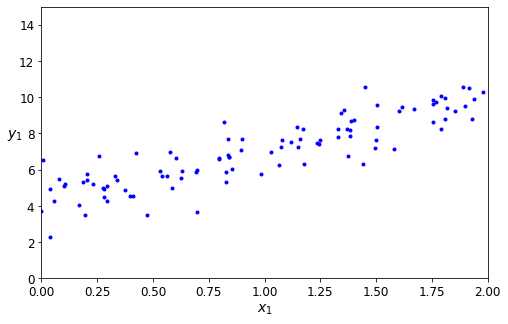

In [37]:
# 선형처럼 보이는 데이터 생성
import numpy as np
np.random.seed(1) # 난수 재현

X = 2 * np.random.rand(100, 1) # 0~2 사이의 난수 발생
y = 4 + 3 * X + np.random.randn(100, 1) # 정규분포 따르는 오차항 생성

plt.figure(figsize = (8,5))
plt.plot(X, y, 'b.') 
plt.xlabel('$x_1$') ; plt.ylabel('$y_1$', rotation = 0) # x축, y축 라벨
plt.axis([0,2,0,15]) # 축범위

In [38]:
# 정규방정식을 활용해 theta_hat 계산
## np.c_[a, b] : 두 개의 1차원 배열 a, b를 세로 열로 붙여 2차원 배열 생성
## np.linalg.inv(x) : x의 역행렬 계산
## np.dot(a, b) : a, b 내적 계산

X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.23695725],
       [2.84246254]])

In [39]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추
y_predict = X_new_b.dot(theta_best)
display(y_predict)

array([[4.23695725],
       [9.92188234]])

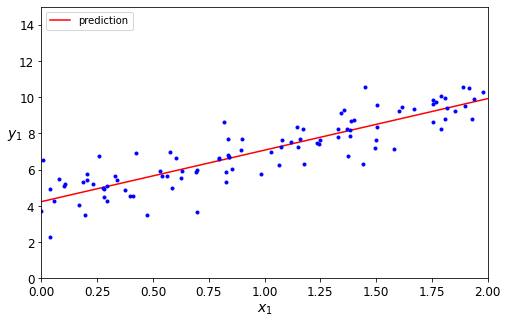

In [40]:
plt.figure(figsize = (8,5))
plt.plot(X_new, y_predict, "r-", label = 'prediction') # 예측선
plt.plot(X, y, "b.") # 무작위 생성 선형 데이터셋
plt.xlabel('$x_1$') ; plt.ylabel('$y_1$', rotation = 0)
plt.axis([0, 2, 0, 15])
plt.legend(loc = 'upper left')

In [41]:
# 사이킷런 선형회귀
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
display(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

array([4.23695725])

array([[2.84246254]])

array([[4.23695725],
       [9.92188234]])

$$\boldsymbol{\hat \theta} = \boldsymbol{X}^+ \boldsymbol{y}$$


In [42]:
# x, residuals, rank, s = np.linalg.lstsq(a, b, rcond = 'warn')
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
display(theta_best_svd)

# np.linalg.pinv() : 유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.23695725],
       [2.84246254]])

array([[4.23695725],
       [2.84246254]])

<img src='old.png' width = '500' height = '500'>

## 경사 하강법<br>
<img src='gd1.png' width = '450' height = '450'><br>

1. learning rate<br>
<img src='gra.png' width = '450' height = '450'><br>
2. plateau<br>
<img src='gd3.png' width = '450' height = '450'><br>
3. scale<br>
<img src='gd4.png' width = '600' height = '600'>

### 배치 경사 하강법 ( batch gradient descent ) <br>
* partial derivative (편도 함수)<br>
<img src='pratial.png' width = '450' height = '450'>
<br><br>

* 경사 하강법의 스텝
<img src='batch_step.png' width = '450' height = '450'>
<br>
<img src='batch_step1.png' width = '400' height = '400'>

In [43]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
display(theta)

array([[4.23695725],
       [2.84246254]])

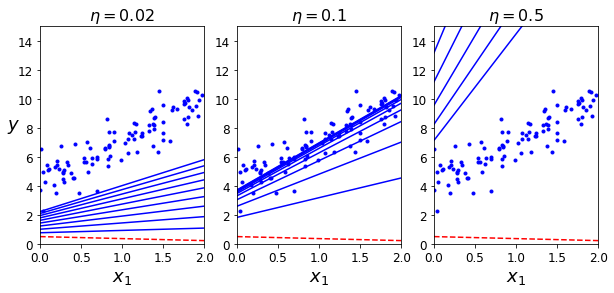

In [44]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

### 확률적 배치 경사 하강법 (SGD, Stochastic Gradient Descent)

* 학습속도 빠름
* 메모리 소모량 낮음
* global minimum 찾을 가능성이 full batch보다 큼
* 무작위 샘플 선정 -> 담금질기법 algorithm !

100


(0.0, 2.0, 0.0, 15.0)

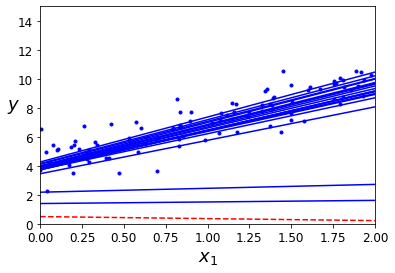

In [45]:
theta_path_sgd = []
m = len(X_b)
print(m)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

In [46]:
theta

array([[4.2504228],
       [2.8318718]])

In [47]:
# SGDRegressor
# np.ravel() : 1차원 배열 반환
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

display(sgd_reg.intercept_, sgd_reg.coef_)

array([4.17946714])

array([2.80444029])

### 미니배치 경사 하강법 (mini batch gradient descent)

In [48]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

display(theta)

array([[4.22321439],
       [2.84331173]])

(2.5, 4.5, 2.3, 3.9)

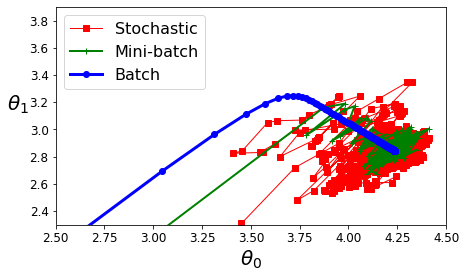

In [49]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# batch vs stochastic vs mini-batch
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

# 다항 회귀 (Polynomial Regression)<br>
* 다항 회귀 모델 함수
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_n x^n$$
<br>
* 예제
$$y = 0.5x_1^2 + 1.0x_1 + 2.0 + \epsilon$$<br>

* 예측 결과
$$\hat y = 0.53x_1^2 + 0.99x_1 + 2.04$$

array([-2.93775508])

array([-2.93775508,  8.63040489])

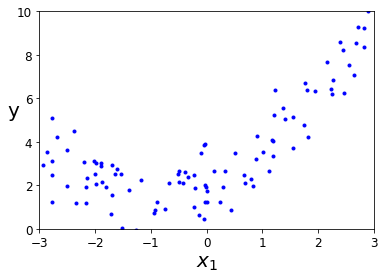

In [71]:
np.random.seed(9)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # 오차항(잡음)) 포함

plt.plot(X, y, 'b.')
plt.xlabel(r'$x_1$', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.axis([-3,3,0,10])

# sklearn의 PolynomialFeatures로 훈련데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
display(X[0]) ; display(X_poly[0])

array([2.03892786])

array([[0.99293225, 0.52737605]])

(-3.0, 3.0, 0.0, 10.0)

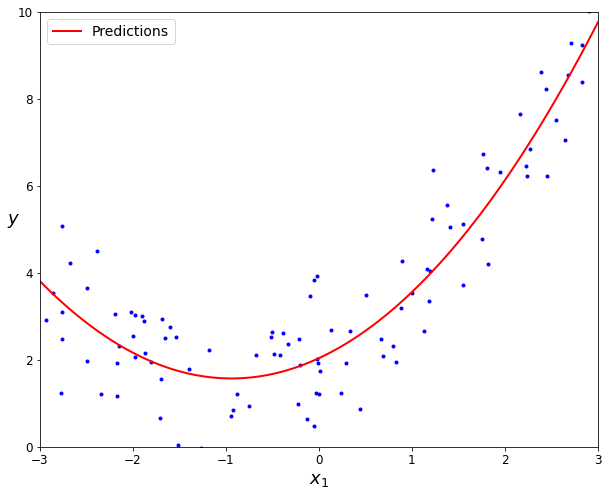

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
display(lin_reg.intercept_, lin_reg.coef_)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize = (10, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

# 학습 곡선 (learning curve)

(-3.0, 3.0, 0.0, 10.0)

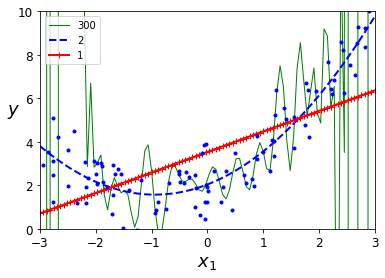

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

![howtoknow](howto.png)

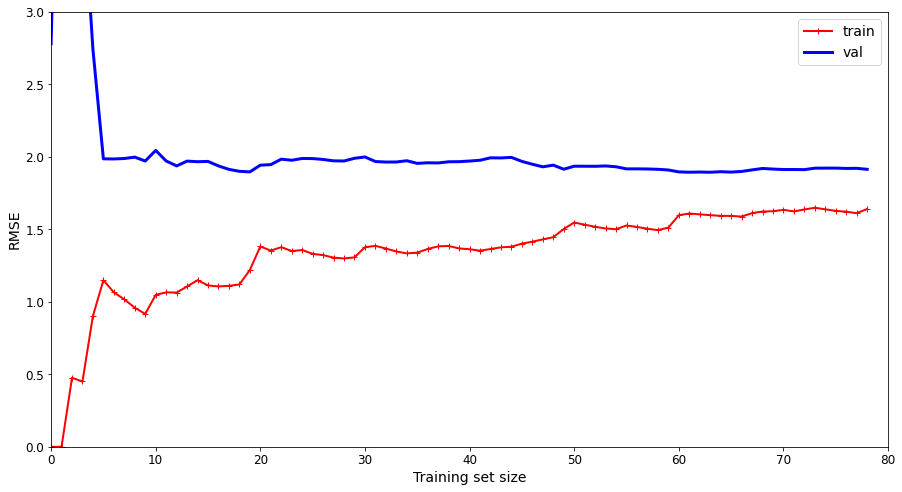

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)
lin_reg = LinearRegression()
plt.figure(figsize = (15,8))
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3]) 
plt.show()

(0.0, 80.0, 0.0, 3.0)

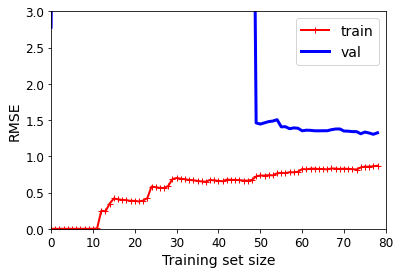

In [54]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

# 규제가 있는 선형 모델<br>

* 목적 : 과대적합 감소

## Ridge Regression<br>
**cost function of ridge regression**<br>
$$J(\boldsymbol \theta) = MSE (\boldsymbol \theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2 $$ <br>

**릿지 회귀 정규 방정식**<br>
$$\hat{\boldsymbol{\theta}} = (\boldsymbol X^TX + \alpha \boldsymbol A)^{-1}\boldsymbol X^T \boldsymbol y$$

In [55]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# Ridge(solver = 'cholesky') : ridge regression using normal equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print('정규방정식 이용한 릿지회귀: ', ridge_reg.predict([[1.5]]))

# Ridge(solver = 'sag') : ridge regression using stochastic gradient descent
# Ridge() 이용
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
print('확률적 경사하강법 이용한 릿지회귀: ',ridge_reg.predict([[1.5]]))

# SGDRegressor(penalty = 'l2') : ridge regression using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('확률적 경사하강법 이용한 릿지회귀2: ', sgd_reg.predict([[1.5]]))


정규방정식 이용한 릿지회귀:  [[1.55071465]]
확률적 경사하강법 이용한 릿지회귀:  [[1.5507201]]
확률적 경사하강법 이용한 릿지회귀2:  [1.47012588]


Text(0.5, 1.1, 'linear regression(left) & polynomial regression(right) using ridge regulazation')

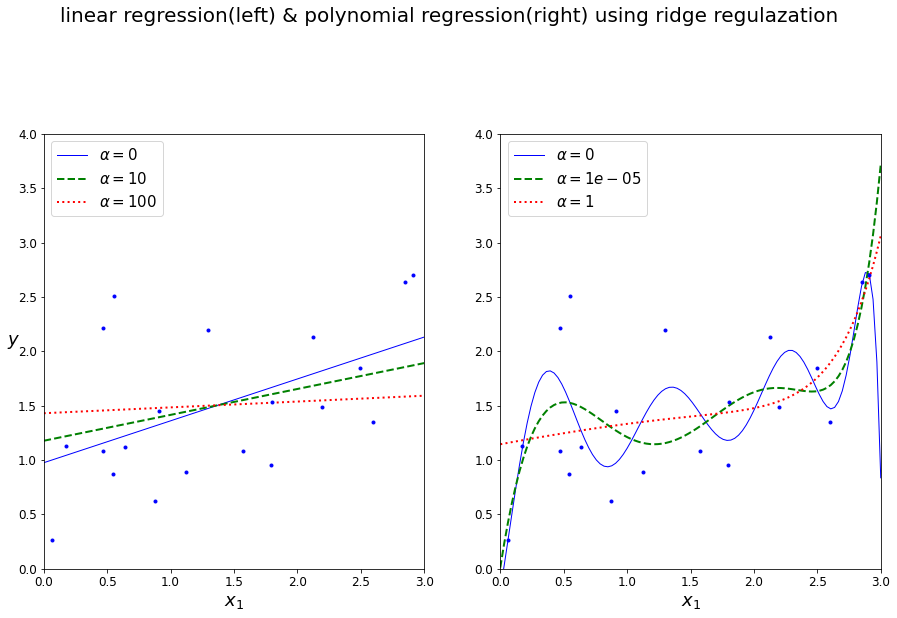

In [56]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(15,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.suptitle('linear regression(left) & polynomial regression(right) using ridge regulazation',
            fontsize = 20, fontweight = 1.4, y = 1.1)


## Lasso Regression
$$J(\boldsymbol \theta) = MSE (\boldsymbol \theta) + \alpha \sum_{i=1}^n|\theta_i| $$

![ridge vs lasso](rvsr.png)<br><br>
![subgradient](sub.png)

In [57]:
# Lasso() : lasso regression using normal equation
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
print('정규방정식을 이용한 라쏘회귀: ', lasso_reg.predict([[1.5]]))

# SGDRegressor(penalty = 'l1') : lasso regression using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('확률적 경사하강법 이용한 라쏘회귀: ', sgd_reg.predict([[1.5]]))

정규방정식을 이용한 라쏘회귀:  [1.53788174]
확률적 경사하강법 이용한 라쏘회귀:  [1.47011206]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827455, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1, 'linear regression(left) & polynomial regression(right) using lasso regulazation')

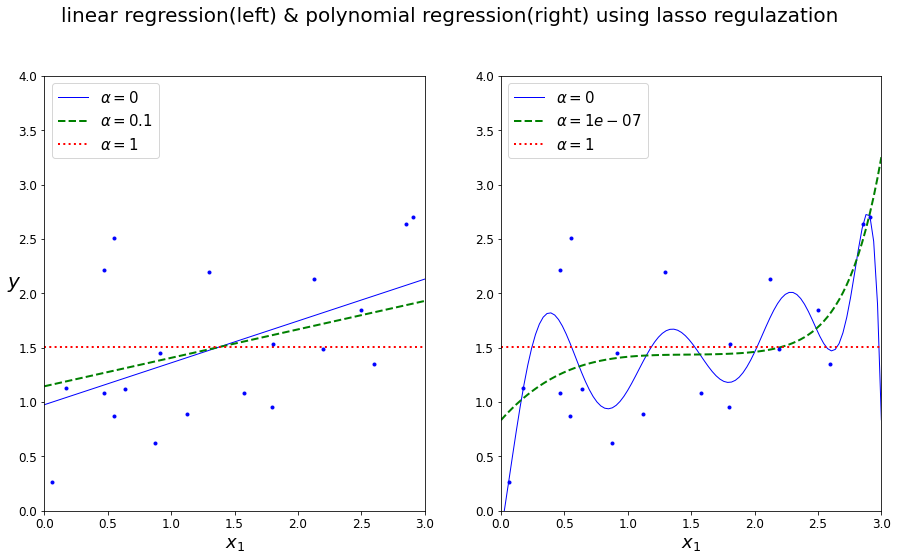

In [58]:
plt.figure(figsize = (15 , 8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize = 20)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.suptitle('linear regression(left) & polynomial regression(right) using lasso regulazation',
            fontsize = 20, fontweight = 1.4, y = 1)

## Elastic Net
$$J(\boldsymbol \theta) = MSE (\boldsymbol \theta) + \gamma \alpha \sum_{i=1}^n|\theta_i| + \frac{1-\gamma}{2} \alpha \sum_{i=1}^n \theta_i^2 $$


In [59]:
# ElasticNet(l1_ratio = ) : elasticnet using normal equation
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
print('정규방정식을 이용한 엘라스틱넷: ', elastic_net.predict([[1.5]]))

# SGDRegressor(penalty='elasticnet', l1_ratio = ) : elasticnet using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="elasticnet", l1_ratio = 0.5, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('확률적 경사하강법 이용한 엘라스틱넷: ', sgd_reg.predict([[1.5]]))


정규방정식을 이용한 엘라스틱넷:  [1.54333232]
확률적 경사하강법 이용한 엘라스틱넷:  [1.47011897]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8030743129029756, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1, 'linear regression(left) & polynomial regression(right) using Elastic Net')

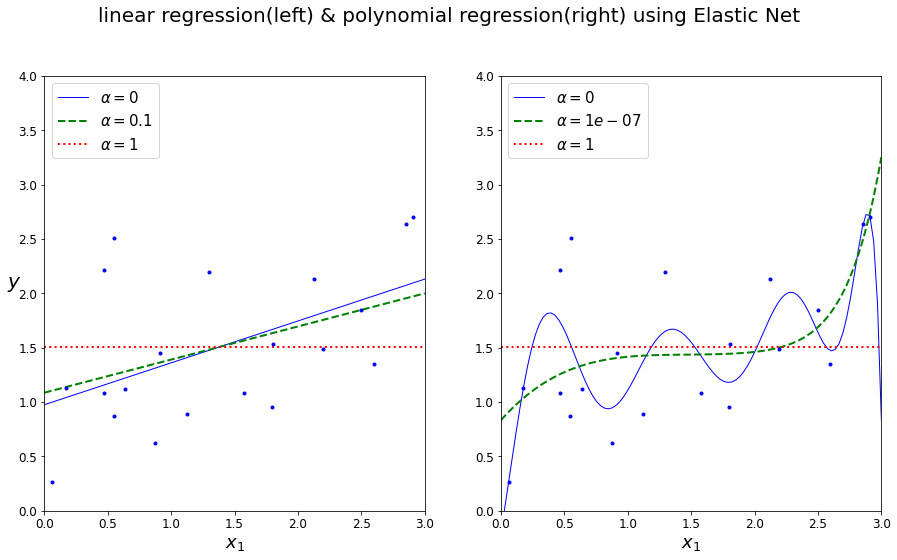

In [60]:
plt.figure(figsize = (15 , 8))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize = 20)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.suptitle('linear regression(left) & polynomial regression(right) using Elastic Net',
            fontsize = 20, fontweight = 1.4, y = 1)

|model|when ? |
|-------|--------|
|linear regression|보통 사용x|
|ridge regression|특성의 개수가 많을경우 기본적으로 사용|
|lasso regression|특성의 개수가 적을경우 사용|
|elastic net|특성의 개수가 적을경우 + 특성끼리 연관된 경우|

## 조기 종료

In [61]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Text(0, 0.5, 'RMSE')

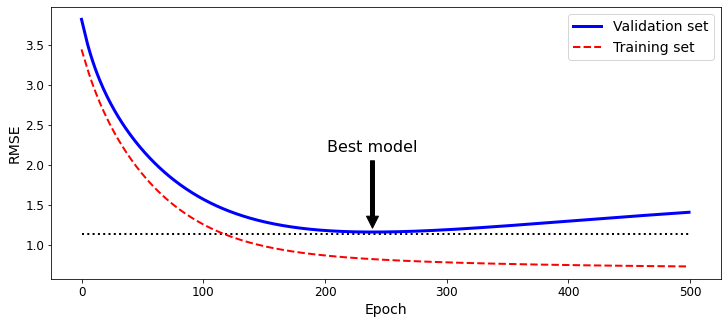

In [62]:
plt.figure(figsize = (12,5))
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

# 로지스틱 회귀 ( Logistic Regression ) <br>

**로지스틱 회귀모형 추정(벡터 표현식)**<br>
$$\hat{p} = \sigma (\boldsymbol{\theta}^T \boldsymbol{x} )$$
**로지스틱 모형**
$$\sigma(t) = \frac{e^ t}{1+e^ t}$$

## 이진 분류기

(-10.0, 10.0, -0.1, 1.1)

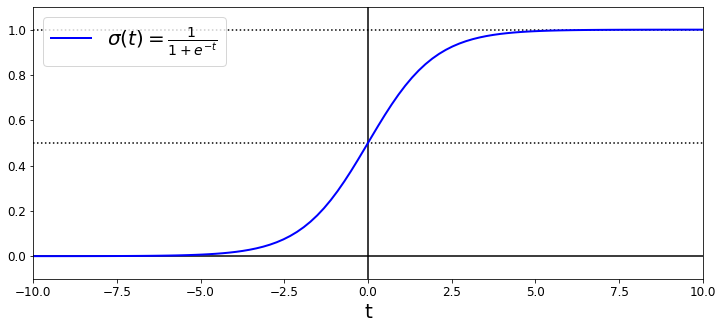

In [63]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t", fontsize = 20)
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

<img src='image.png' width = '450' height = '450'>

In [64]:
# 데이터 로드 및 데이터 확인
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys())) ; print('-------')
print(iris.DESCR) ; print('-------')
print(iris.data) ; print('-------')
print(iris.target) ; print('-------')
print(iris.feature_names) ; print('-------')
print(iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
-------
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2

In [65]:
# 필요 데이터 추출
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0

# 로지스틱 회귀 모형 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

/var/folders/dr/6msfb1qj7w9cvw_lz86pmzq40000gn/T/ipykernel_59820/2456361206.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0


LogisticRegression(random_state=42)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


(0.0, 3.0, -0.02, 1.02)

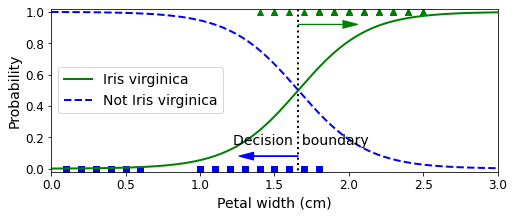

In [66]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

In [67]:
print(decision_boundary, end='\n\n')
print(log_reg.predict([[1.7], [1.5]]))

[1.66066066]

[1 0]


/var/folders/dr/6msfb1qj7w9cvw_lz86pmzq40000gn/T/ipykernel_59820/102034367.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


(2.9, 7.0, 0.8, 2.7)

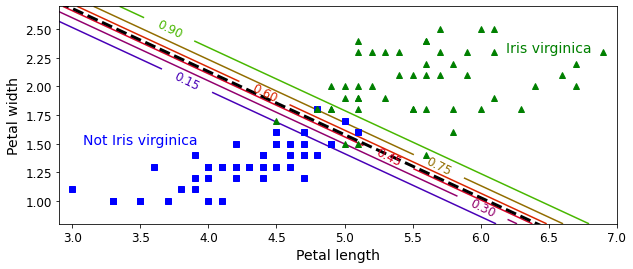

In [68]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

## 소프트맥스 회귀<br>
**<center>softmax score** <br><br>
$$s_k(\boldsymbol{x}) = (\boldsymbol {\theta}^{(k)})^{T} \boldsymbol{x} $$
<br><br>
**<center>softmax function**<br><br>
$$\hat{p_k} = \sigma (\boldsymbol{s(\boldsymbol{x})})_k = \frac{exp(s_k(\boldsymbol {x}))}{\sum_{j=1}^K exp(s_j(\boldsymbol{x}))}$$
<br><br>
**<center>softmax prediction**<br><br>
$$ \hat{y} = \underset {k} argmax ((\boldsymbol{\theta}^{(k)})^T \boldsymbol{x})$$
<br><br>
**<center>cross entropy cost function**<br><br>
$$J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} log(\hat p_k^{(i)})$$

In [69]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


(0.0, 7.0, 0.0, 3.5)

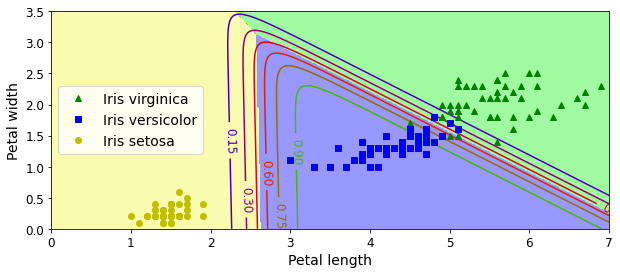

In [70]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])